# Tarea 1: *Crimes* y *Nutrients*

*Carolina Giménez Arias*

## *Crimes*

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [282]:
crimes = pd.read_csv('crim_gen.tsv', sep = ',', na_values = ': ')
print ("Los tipos de crímenes existentes son:", crimes['iccs'].unique())
crimes.head()

Los tipos de crímenes existentes son: ['DBURG' 'DRUGT' 'HCIDE' 'ROBBR' 'TOTAL' 'VIOLT' 'VTHFT']


,unit,iccs,country,2012,2011,2010,2009,2008,2007,2006,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993
0,NR,DBURG,AL,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NR,DBURG,AT,15479.0,15616.0,15747.0,21248.0,18648.0,20040.0,18945.0,...,12674.0,13008.0,13262.0,10111.0,11811.0,12826.0,13849.0,13721.0,14160.0,NaN
2,NR,DBURG,AU,NaN,NaN,NaN,NaN,NaN,164305.0,172025.0,...,258157.0,277158.0,275821.0,273867.0,295699.0,284974.0,269554.0,256772.0,240765.0,235634.0
3,NR,DBURG,BE,80708.0,75310.0,68548.0,69446.0,64045.0,62964.0,63615.0,...,79203.0,77330.0,83315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NR,DBURG,BG,16781.0,20272.0,24005.0,23682.0,19980.0,22208.0,23460.0,...,31639.0,36269.0,39455.0,33004.0,43830.0,85356.0,70126.0,80671.0,NaN,NaN


 La clase "TOTAL" será considerada como una clase más.

** - ¿Cómo se distribuyen las causas de crímenes en España? ¿Se distribuyen igual en los paises vecinos?**

En primer lugar examinaremos para un único año, por ejemplo, 2012, cuál fue la distribución de los tipos de crímenes en España:

Text(0.5,1,'Distribución de causas de crímenes en España en el año 2012')

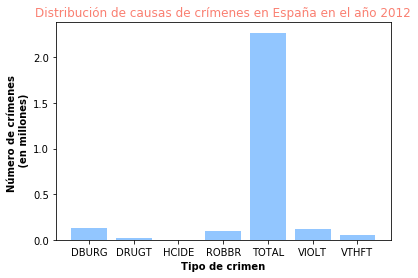

In [284]:
plt.style.use('seaborn-pastel')

espa = crimes.query('country == "ES"')

plt.bar(espa['iccs'], espa['2012']/1e6)
plt.xlabel('Tipo de crimen', fontweight='bold')
plt.ylabel('Número de crímenes \n (en millones)', fontweight='bold')
plt.title("Distribución de causas de crímenes en España en el año 2012", color = "salmon")

Al parecer la primera causa de crimen en España es del tipo TOTAL, mientras que la última causa de crimen en España sería la tipo HCIDE. Esto podría explicarse si se suponiese que el tipo de clase "TOTAL" se corresponde a la suma de crímenes teniendo en cuenta todos los tipos (incluso algunos que no figuran en este dataset, pues parece ser que tan solo sumando DBURG, DRUGT, HCIDE, ROBBR, VIOLT Y VTHFT no se llega a alcanzar la suma de TOTAL). 

Estudiaremos el resto de causas de crímenes de forma más detallada para el mismo año sin tener en cuenta el tipo TOTAL ni el tipo HCIDE, ya que parece que este último no alcanza siquiera el 1% de los crímenes:

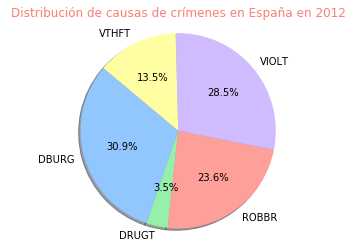

In [285]:
sintotal12 = espa.query('iccs != "TOTAL"')[['iccs','2012']]
sintotal12 = sintotal12.query('iccs != "HCIDE"')

labels = sintotal12['iccs'].tolist()
sizes = sintotal12['2012'].tolist()

# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.title("Distribución de causas de crímenes en España en 2012", color = "salmon")

plt.show()

Eliminando TOTAL y HCIDE, el 30,9% de los crímenes son de tipo DBURG y el 28,5% de tipo VIOLT. El resto, son de tipo ROBBR, VTHFT y por último DRUGT.

A continuación, estudiamos la distribución de los tipos de crimen para sus países vecinos (Portugal y Francia):

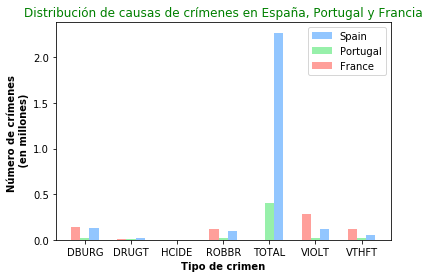

In [286]:
bar_width = 0.2
ic = np.arange(len(espa['iccs']))

espa = crimes.query('country == "ES"')
plt.bar(ic + bar_width, espa['2012']/1e6, width=0.2, label = "Spain")

portu = crimes.query('country == "PT"')
plt.bar(ic, portu['2012']/1e6, width=0.2, label = "Portugal")

france = crimes.query('country == "FR"')
plt.bar(ic - bar_width, france['2012']/1e6, width=0.2, label = "France")

plt.xlabel('Tipo de crimen', fontweight = 'bold')
plt.ylabel('Número de crímenes \n (en millones)', fontweight = 'bold')
plt.title("Distribución de causas de crímenes en España, Portugal y Francia", color = "green")
plt.xticks(np.arange(7), espa['iccs'])
plt.legend()

Se observa como vuelve a destacar el caso de los crímenes de tipo "Total" tanto en España como en Portugal para dicho año, aunque el número de crímenes parece ser mucho mayor en el caso de España con respecto al resto de sus países vecinos. Del mismo modo, parece que no existen o no se aprecian los datos de los crímenes de tipo "total" en Francia. A continuación, siguiendo una metodología similar a la del anterior punto, observaremos la distribución sin tener en cuenta el tipo TOTAL:

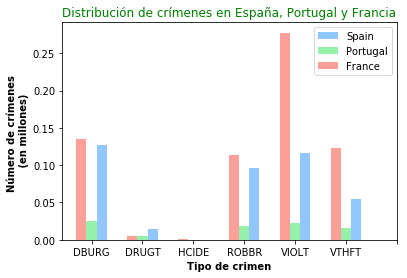

In [287]:
espasintotal12 = espa.query('iccs != "TOTAL"')[['iccs', '2012']]
portusintotal12 = portu.query('iccs != "TOTAL"')[['iccs', '2012']]
francesintotal12 = france.query('iccs != "TOTAL"')[['iccs', '2012']]

bar_width = 0.2

#España:
ic = np.arange(len(espasintotal12['iccs']))
plt.bar(ic + bar_width, espasintotal12['2012']/1e6, width=0.2, label = "Spain")

#Portugal:
portu = crimes.query('country == "PT"')
plt.bar(ic, portusintotal12['2012']/1e6, width=0.2, label = "Portugal")

#Francia:
france = crimes.query('country == "FR"')
plt.bar(ic - bar_width, francesintotal12['2012']/1e6, width=0.2, label = "France")


plt.xlabel('Tipo de crimen', fontweight = "bold")
plt.ylabel('Número de crímenes \n (en millones)', fontweight = "bold")
plt.title("Distribución de crímenes en España, Portugal y Francia", color = "green")
plt.xticks(np.arange(7), espasintotal12['iccs'])
plt.legend()

Se observa como, generalmente, para cada país los tipos de crímenes más comunes coinciden aproximadamente (en primer lugar VIOLT, luego DBRUG, VTHFT, ROBBR, DRUGT y HCIDE), sin embargo, no coinciden en cantidad. En este ocasión, Francia parece ser el país con mayor número de crímenes para prácticamente todos los tipos. Cabe destacar que Portugal tiene generalmente un númer de crímenes mucho más bajo para todos los tipos. A su vez, también se aprecia como el tipo de crimen DRUGT es más alto en España que en Portugal y Francia.

- **¿Cómo ha evolucionado el total de crímenes en España y en los países vecinos?**

Para estudiar la evolución del total de crímenes en España y en sus países vecinos, se ploteará la evolución de la cantidad de crímenes de tipo "TOTAL" a lo largo de los años para cada uno de estos países:

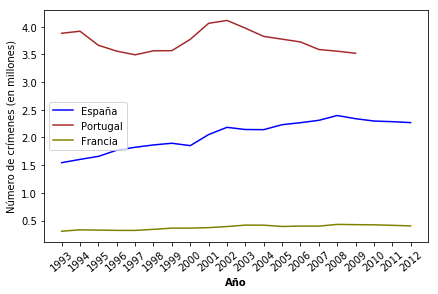

In [288]:
crimesEPF = crimes[crimes.country.isin(['ES', 'PT', 'FR'])]
total_crimes = crimesEPF.query('iccs == "TOTAL"').values
x = np.arange(len(total_crimes[0][3:]))

#España:
plt.plot(x, total_crimes[0][3:][::-1]/1e6, color = 'blue', label = "España")
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)

#Portugal:
plt.plot(x, total_crimes[1][3:][::-1]/1e6, color = 'brown', label = "Portugal")
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)

# Francia
plt.plot(x, total_crimes[2][3:][::-1]/1e6, color = 'olive', label ="Francia")
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)

plt.tight_layout()
plt.xlabel('Año', fontweight = "bold")
plt.ylabel('Número de crímenes (en millones)')
plt.legend(loc = 6)
plt.show()

Si observamos la evolución temporal en estos 3 países se aprecia como no se obtienen datos del total de crímenes para Portugal a partir del año 2009. Esto explicaría que en los apartados anteriores el total de crímenes no apareciera para Portugal y los de España fueran los más altos. 

En España la tendencia del número de crímenes es creciente con el paso de los años, mientras que, en Francia, esta parece haber crecido algo desde 1993 hasta 2012, pero no es demasiado pronunciado. Por otro lado, el número de crímenes en Portugal de tipo "total" generalmente es mucho mayor en Portugal con respecto a Francia y España y su tendencia es mucho más aleatoria (experimentó un decrecimiento brusco a partir de 1994 y luego un aumento que tuvo su pico en 2002, para luego volver a decrecer).

- **¿Cúales son los 4 paises más peligrosos? **

Para valorar la peligrosidad de cada país, plotearemos en orden (de mayor a menor) el número de crímenes total de cada país:

Text(0,0.5,'País')

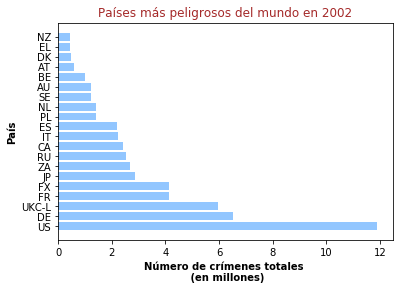

In [289]:
crimes02 = crimes.query('iccs == "TOTAL"')[['country','2002']]
crimes02_sorted = crimes02.sort_values(by='2002', ascending = False)

# Seleccionaremos sólo los 20 primeros países ya ordenados para plotear:
plt.barh(crimes02_sorted['country'][0:20],crimes02_sorted['2002'][0:20]/1e6)
plt.title("Países más peligrosos del mundo en 2002", color = "brown")
plt.xlabel("Número de crímenes totales \n (en millones)", fontweight="bold")
plt.ylabel("País", fontweight="bold")


El país más peligroso es Estados Unidos (US), con casi 12 millones de crímenes en el año 2002. Le sigue Alemania (DE), UKC-L y Francia. Vemos cuál es la distribución de los países para cada tipo de crimen:

Crímenes de tipo DBURG en 2002


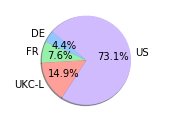

Crímenes de tipo DRUGT en 2002


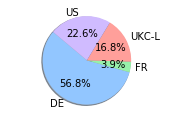

Crímenes de tipo HCIDE en 2002


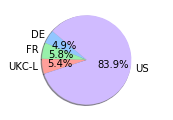

Crímenes de tipo ROBBR en 2002


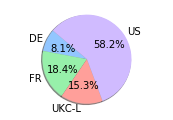

In [290]:
peligrosos = crimes[crimes.country.isin(['US','DE','UKC-L','FR'])]
peligrosos = peligrosos.query('iccs != "TOTAL"')[['iccs','2002','country']].values
a = [0,4,8,12]

for j in a:
    sizes = []
    labels = []
    for i in range(4):
        sizes.append(peligrosos[j:j+4][i][1])
        labels.append(peligrosos[j:j+4][i][2])
    print("Crímenes de tipo",peligrosos[j:j+4][i][0], "en 2002")
    plt.subplot(2,2,i)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow = True, startangle = 140)
    plt.axis('equal')
    plt.show()

Tal y como era de esperar, US representa el porcentaje máximo de crímenes para todos los tipos excepto para el tipo DRUGT, donde Alemania supera al resto de países con un 56,8% de crímenes. 

Ahora estudiaremos la evolución de crímenes TOTAL de Estados Unidos frente a España:

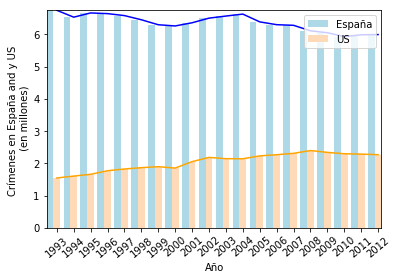

In [292]:
pcrimes = crimes[crimes.country.isin(['ES','US','DE','UKC-L'])]
total_crimes = pcrimes.query('iccs == "TOTAL"').values

ax = plt.subplot(111)
w = 0.4

ax.bar(x-w, total_crimes[0][3:][::-1]/1e6,width=w,color='lightblue',align='center', label = "España")
plt.plot(x, total_crimes[0][3:][::-1]/1e6, color = 'blue')

ax.bar(x, total_crimes[1][3:][::-1]/1e6,width=w, color='peachpuff',align='center', label = "US")
plt.plot(x, total_crimes[1][3:][::-1]/1e6, color = 'orange')

ax.autoscale(tight = True)
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)
plt.xlabel('Año')
plt.ylabel('Crímenes en España and y US \n (en millones)')
plt.legend(loc = 'upper right')

En US parece aumentar ligeramente el número de crímenes con los años, mientras que en españa tiende a disminuir.

Paralelamente, podemos ver la evolución del total de crímenes en los otros dos países más peligrosos (Alemania y UKC-L):

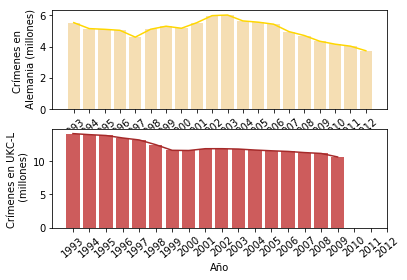

In [293]:
# Alemania:
plt.subplot(2,1,1)
plt.plot(x, total_crimes[2][3:][::-1]/1e6, color = 'gold')
plt.bar(x, total_crimes[2][3:][::-1]/1e6, color = 'wheat')
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)
plt.xlabel('Año')
plt.ylabel('Crímenes en \n Alemania (millones)')

# UKC-L:
plt.subplot(2,1,2)
plt.plot(x, total_crimes[3][3:][::-1]/1e6, color = 'brown')
plt.bar(x, total_crimes[3][3:][::-1]/1e6, color = 'indianred')
plt.xticks(x, crimes.columns[3:][::-1], rotation = 40)

plt.xlabel('Año')
plt.ylabel('Crímenes en UKC-L \n (millones)')

plt.show()

Afortunadamente se observa como el número de crímenes en estos países también decrece con el paso de los años.

## *Nutrients*

In [301]:
#Importamos las librerías con las que se va a trabajar

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [302]:
pd.options.display.max_rows = 100
db = json.load(open('./foods-2011-10-03.json'))

print("Keys: ", db[0].keys())
print("Nutrient 0: ",db[0]['nutrients'][0])

Keys:  dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])
Nutrient 0:  {'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}


In [303]:

# Exploramos los nutrientes 
nutrients = pd.DataFrame(db[0]['nutrients'])
#print(nutrients[:10])

# Data Frame con la info importante asociada a los nutrientes (se filtra el resto: tags, portions,...)
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)

#print("Info: ", info[:10])
pd.options.display.max_rows = 100
pd.value_counts(info.group)

# Lista de Data Frame de nutrientes
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
#print(nutrients[:10])


In [304]:

nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()

col_mapping = {'description' : 'food', 'group' : 'fgroup'}
info = info.rename(columns=col_mapping, copy = False)
col_mapping = {'description' : 'nutrient', 'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
ndata = pd.merge(nutrients, info, on='id', how='outer')
print(ndata.iloc[375173])


nutrient                 Fatty acids, total saturated
nutgroup                                        Other
units                                               g
value                                           0.072
id                                              43546
food            Babyfood, banana no tapioca, strained
fgroup                                     Baby Foods
manufacturer                                     None
Name: 375173, dtype: object


- **¿Qué grupos de alimentos tienen más magnesio? ¿y más vitaminas?**

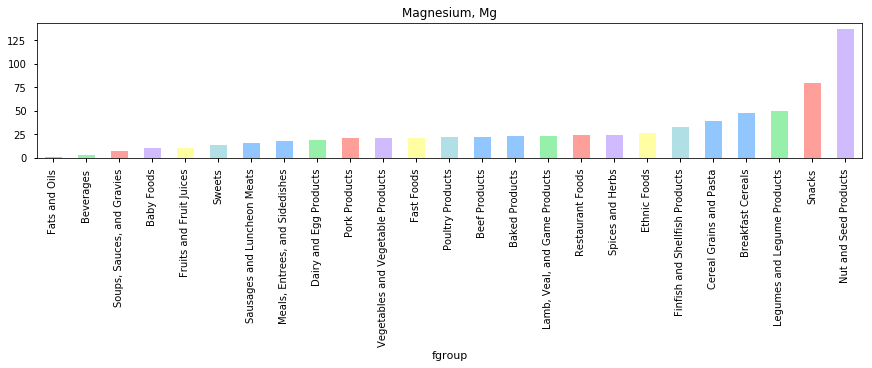

In [309]:

plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos y calculamos mediana
result['Magnesium, Mg'].sort_values().plot(kind='bar') # Seleccionamos el Magnesio
plt.title("Magnesium, Mg")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()


Sin duda el grupo de alimentos con más magnesio son las nueces y semillas, con aproximadamente 125 miligramos promedio. Le siguen los *snacks* con algo más de 80 gramos y, posteriormente, las legumbres y los cereales para desayunos con, aproximadamente 55 gramos de Magnesio.

Debido a que existen numerosos tipos de vitaminas, para  estudiar qué grupos de alimentos tienen más, en primer lugar se examinarán las distintas cantidades de vitaminas presentes en los datos. De este modo, se estudiarán aquellas cuyas cantidades resulten más significativas, calculando el promedio de sus valores , en algunos casos, el total de vitaminas de cada subgrupo.

In [306]:
print("Las distintas unidades en las que se miden las cantidades de vitaminas son:", ndata.query('nutgroup == "Vitamins"')['units'].unique())

Las distintas unidades en las que se miden las cantidades de vitaminas son: ['IU' 'mcg' 'mcg_RAE' 'mg' 'mcg_DFE']


En primer lugar, separaremos aquellas cuyas unidades estén en miligramos:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1674d43c8>],
      dtype=object)

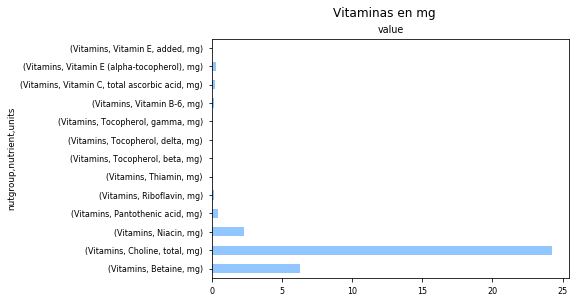

In [307]:

pruebamg = ndata.query('units == "mg"')# Seleccionamos el subgrupo en mg
resvit = pd.DataFrame(pruebamg.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5)) #agrupamos y calculamos media
resvitmg = resvit.query('nutgroup == "Vitamins"')
resvitmg.sort_values(by = "nutgroup").plot(kind='barh', legend = None, subplots = True, title = "Vitaminas en mg")


La colina aparece en gran cantidad, seguida de la Betaína y la Niacina. El resto de vitaminas aparecen en cantidades prácticamente infimas (algunas podrían ser incluso despreciadas en comparación con la colina, por ejemplo)

Es conocido que algunas vitaminas como la vitamina A o la vitamina D se miden en IU (International Units o unidades internacionales). El equivalente biológico de 1 IU de vitamina A equivale a 0,3 μg de retinol, o de 1,8 μg de beta-caroteno. Calcularemos el total de vitamina A y D presente para hacer una comparación de cuál de estas dos es la que aparece generalmente en mayor cantidad en los alimentos: 

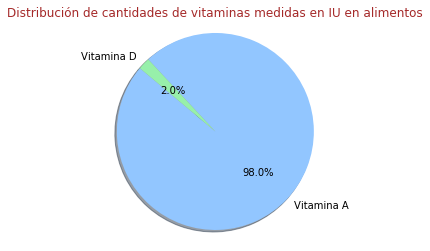

In [299]:
vitaminaAD = ndata.query('units == "IU"').groupby(['nutrient'])['value'].sum()

sizes = vitaminaAD.values
labels = ["Vitamina A", "Vitamina D"]

# Plot
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.title("Distribución de cantidades de vitaminas medidas en IU en alimentos", color = "brown")

plt.show()

Se aprecia como la vitamina A es mucho más mayoritaria que la D.

Ahora estudiaremos cual es la cantidad media de vitaminas medidas en mcg. Para este caso se despreciarán aquellas vitaminas que no superen los 0.1 mcg:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112af7a58>],
      dtype=object)

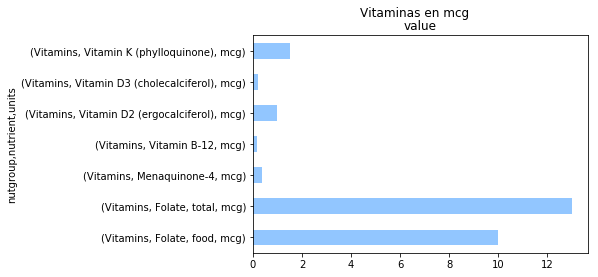

In [300]:

pruebamcg = ndata.query('units == "mcg"')
resvit2 = pd.DataFrame(pruebamcg.groupby(['nutgroup', 'nutrient','units'])['value'].quantile(0.5)) #agrupamos y calculamos media
resvitmcg = resvit2.query('nutgroup == "Vitamins" & value > 0.1')
resvitmcg.sort_values(by = "nutgroup").plot(kind='barh', legend = None, subplots = True, title = "Vitaminas en mcg")


Se observa como, tanto la Vitamina A como la Colina y el Folato son las más destacables en cada subgrupo, razón por la cual se estudiará la presencia de estas en los grupos nutricionales:

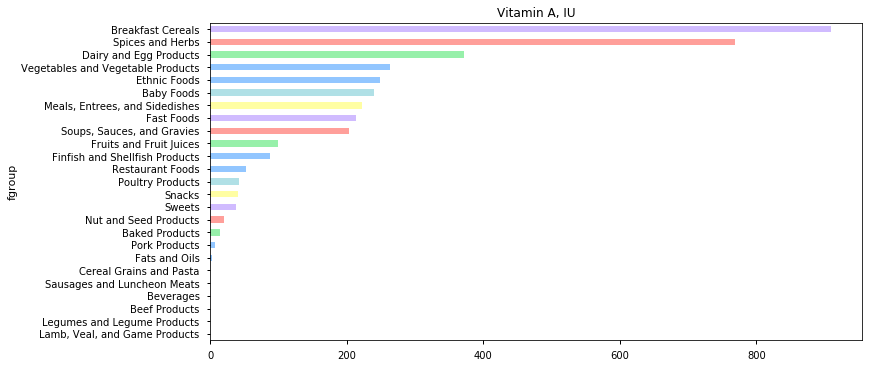

In [310]:
# Para la vitamina A
plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos
result['Vitamin A, IU'].sort_values().plot(kind='barh') # Seleccionamos la Vitamina A, IU

plt.title("Vitamin A, IU")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()

La Vitamina A aparece sobretodo en cereales, en hierbas y especias, así como en lácteos y huevos.

La segunda más predominante es la *Choline* o colina en español, esta aparece sobretodo en carnes como la ternera o el cordero y en demás productos cárnicos (como el vacuno y el cerdo)

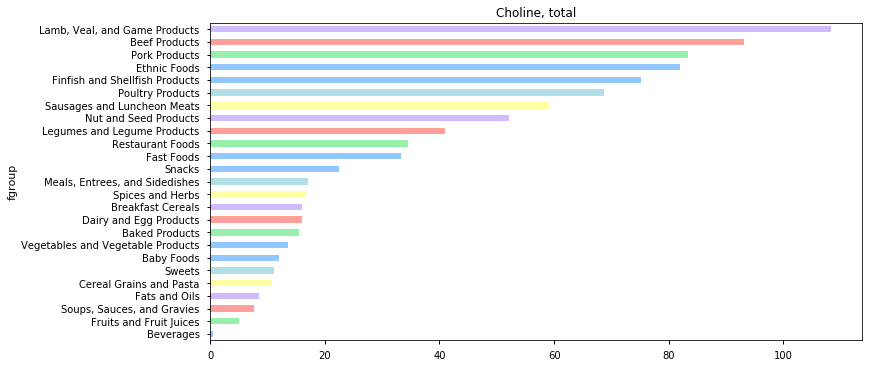

In [311]:

plt.figure(figsize=(12,5))
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5) #Agrupamos por nutriente y grupos de alimentos
result['Choline, total'].sort_values().plot(kind='barh') # Seleccionamos la Vitamina A, IU
plt.title("Choline, total")
plt.tight_layout(pad=0.3, w_pad=0.1, h_pad=0.1)
plt.show()


-  **¿Qué tipo de nutrientes tienen los productos cárnicos? (beef and pork) ... comparalos con los vegetales.  **

<Figure size 576x396 with 0 Axes>

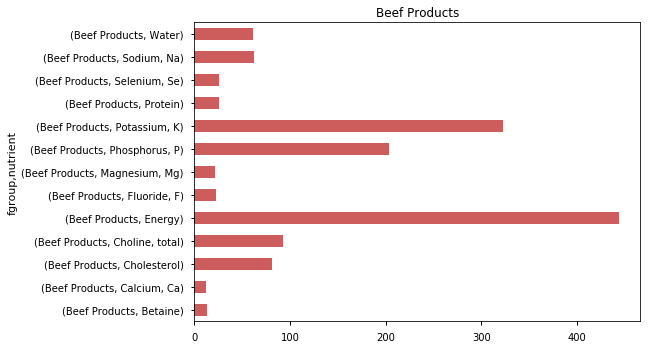

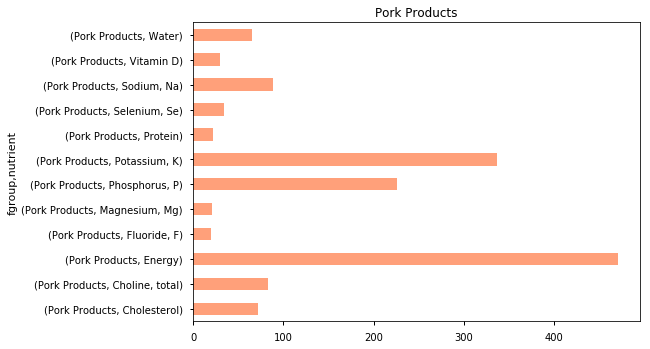

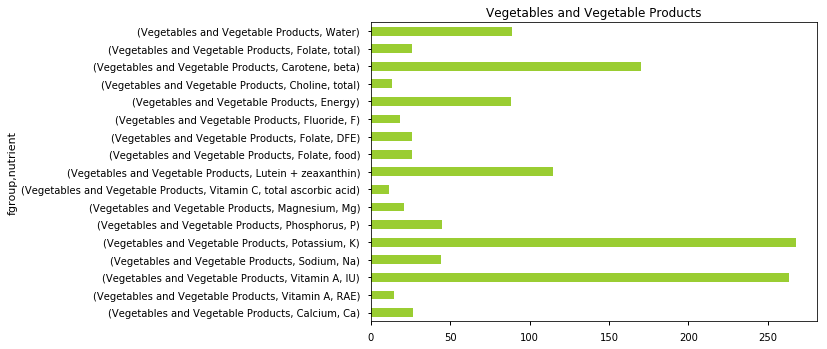

In [312]:

plt.figure()
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))

# Para beef
resbeef = res1.query('fgroup == "Beef Products" & value > 10')
resbeef.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'indianred')
plt.title("Beef Products")


# Para pork
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))
respork = res1.query('fgroup == "Pork Products" & value > 10')
respork.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'lightsalmon')
plt.title("Pork Products")


# Para verduras
res1 = pd.DataFrame(ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5))
resveg = res1.query('fgroup == "Vegetables and Vegetable Products" & value > 10')
resveg.sort_values(by = "fgroup").plot(kind='barh', legend=None, color = 'yellowgreen')
plt.title("Vegetables and Vegetable Products")

plt.show()


En los productos cárnicos predominan la Energía y el Potasio (tanto en los provenientes de la vaca como los del cerdo), destacando que parece ser que el cerdo aporta más energía (sobre los 450 g, mientras que el cerdo se queda en aproximadamente 430 g). Ambas variedades de carne poseen prácticamente los mismos nutrientes, sólo difieren en que el cerdo aporta Vitamina D y la vaca Calcio y Betamina. Los niveles de colesterol suelen ser más altos en carnes de vacuno (estarían sobre los 90 g) que en las de cerdo, los cuales se aproximan a 80g, sin embargo, sería necesario estudiar si dicho colesterol se refiere a HDL o a LDL, comúnmente conocidos como "colesterol del bueno" o "colesterol del malo" para poder indicar si es contraproducente o no la ingesta de este tipo de alimentos en determinadas personas (por ejemplo en aquellas con cardioparías concretas).

En cuanto a la comparación de este tipo de carnes con las verduras, se observa que en estas predomina la concentración de potasio, la cual ronda los 265 g, y la de vitamina A, que se encuentra en aproximadamente 260g. También aparecen niveles altos de beta caroteno (aproximadamente 170 g). Destacar que, tanto la vitamina A como el beta caroteno no se encontraban presentes en los productos cárnicos de cerdo y vaca.

Del mismo modo también es posible comparar algunos de los nutrientes comunes entre los grupos de comida tipo *Sweets*, *Beverages* y *Snacks*. Por ejemplo, sería interesante observar la cantidad de carbohidratos, azúcares y agua que cada uno de estos grupos contiene:

/Users/carolgimenezarias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'nutrient' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """


Text(0,0.5,'gramos')

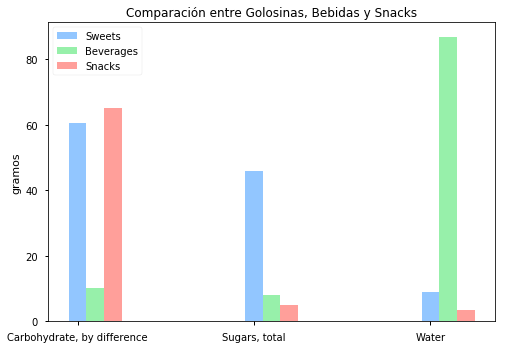

In [313]:
ic = np.arange(3)

ndata.index = ndata['nutrient']

datamod = ndata.groupby(['fgroup', 'nutrient'])['value'].quantile(0.5)
indices = [i for i, x in enumerate(datamod.Sweets.keys()) if x == "Sugars, total" or x =="Water" or x == "Carbohydrate, by difference"]
plt.bar(datamod.Sweets.keys()[[indices]], datamod.Sweets.values[indices], label = "Sweets",width=0.1)

indices2 = [i for i, x in enumerate(datamod.Beverages.keys()) if x == "Sugars, total" or x =="Water" or x == "Carbohydrate, by difference"]
plt.bar(ic + 0.1, datamod.Beverages.values[indices2], label = "Beverages",width=0.1)

indices3 = [i for i, x in enumerate(datamod.Snacks.keys()) if x == "Sugars, total" or x =="Water" or x == "Carbohydrate, by difference"]
plt.bar(ic + 2*0.1, datamod.Snacks.values[indices3], label = "Snacks", width=0.1)

plt.legend()
plt.title("Comparación entre Golosinas, Bebidas y Snacks")
plt.ylabel("gramos")

Como era de esperar, los refrescos son los que mayor cantidad de agua poseen, mientras que los snacks destacan por la gran cantidad de carbohidratos que aportan. A su vez, los dulces o *sweets* contienen mucha cantidad de azúcares y de carbohidratos.